In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1=pd.read_csv("college_report.csv")

In [3]:

df1.columns = ["index","S.NO","Hall Ticket","Rank","Application Name","Gender","Caste","Region","Allotted Category","Phase","clg_name"]
df1 = df1.iloc[2:].reset_index(drop=True)



In [5]:
df1

,index,S.NO,Hall Ticket,Rank,Application Name,Gender,Caste,Region,Allotted Category,Phase,clg_name
0,1,1,550496010117,108235.0,BANDI VENKATESH,M,OC,SVU,OC_GEN_AU,1,abr college
1,2,2,550660020020,159388.0,GANGI REDDY KRISHNA REDDY,M,OC,SVU,OC_GEN_AU,1,abr college
2,3,3,550879020107,170722.0,DASARI PAVITHRA,F,SC_III,SVU,OC_GIRLS_AU,1,abr college
3,4,4,550896010163,99479.1,BADVELU ANJI REDDY,M,OC,SVU,OC_GEN_AU,1,abr college
4,5,5,550957010036,159406.0,ANDHE PARVATHI,F,SC_III,SVU,OC_GIRLS_AU,1,abr college
...,...,...,...,...,...,...,...,...,...,...,...
5578,5579,245,551083010210,23078.0,CHATLA EESHA REDDY,F,BC_A,AU,BC_A_GIRLS_AU,1,vvit
5579,5580,246,551084020121,7032.0,TUPILI SAI AANTHARYA,F,OC,SVU,OC_GIRLS_UR,1,vvit
5580,5581,247,551086050012,18345.0,VENGALATHURU PRAJNA,F,BC_B,SVU,BC_B_PWD_GEN_AU,1,vvit
5581,5582,248,551092020072,16874.0,KALISETTI JASWANTH,M,BC_D,AU,BC_D_GEN_AU,1,vvit


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              5583 non-null   object
 1   S.NO               5583 non-null   object
 2   Hall Ticket        5583 non-null   object
 3   Rank               5583 non-null   object
 4   Application Name   5583 non-null   object
 5   Gender             5583 non-null   object
 6   Caste              5583 non-null   object
 7   Region             5583 non-null   object
 8   Allotted Category  5583 non-null   object
 9   Phase              5583 non-null   object
 10  clg_name           5583 non-null   object
dtypes: object(11)
memory usage: 479.9+ KB


In [7]:
df1["S.NO"] = df1["S.NO"].astype(int)
df1["Hall Ticket"] = df1["Hall Ticket"].astype(str)
df1["Rank"] = pd.to_numeric(df1["Rank"], errors="coerce")  # Float automatically
df1["Gender"] = df1["Gender"].astype("category")
df1["Caste"] = df1["Caste"].astype("category")
df1["Region"] = df1["Region"].astype("category")
df1["Allotted Category"] = df1["Allotted Category"].astype("category")
df1["Phase"] = df1["Phase"].astype(int)


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5583 entries, 0 to 5582
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   index              5583 non-null   object  
 1   S.NO               5583 non-null   int64   
 2   Hall Ticket        5583 non-null   object  
 3   Rank               5583 non-null   float64 
 4   Application Name   5583 non-null   object  
 5   Gender             5583 non-null   category
 6   Caste              5583 non-null   category
 7   Region             5583 non-null   category
 8   Allotted Category  5583 non-null   category
 9   Phase              5583 non-null   int64   
 10  clg_name           5583 non-null   object  
dtypes: category(4), float64(1), int64(2), object(4)
memory usage: 338.6+ KB


# Highest Rank

In [9]:
k=df1["Rank"].min()
df1[df1["Rank"]==k]

,index,S.NO,Hall Ticket,Rank,Application Name,Gender,Caste,Region,Allotted Category,Phase,clg_name
3735,3736,39,550592030009,523.0,MEDICHARLA DIVYA SAROJA,F,OC,AU,OC_GIRLS_UR,1,shri vishnu engg


# Lowest Rank

In [10]:
k1=df1["Rank"].max()
df1[df1["Rank"]==k1]

,index,S.NO,Hall Ticket,Rank,Application Name,Gender,Caste,Region,Allotted Category,Phase,clg_name
1584,1585,120,550595020009,180064.0,RAPURI ENOSH PAUL,M,SC_III,SVU,SC_III_GEN_SVU,1,annamacharya inst of technology


# Top 5000 Rankers

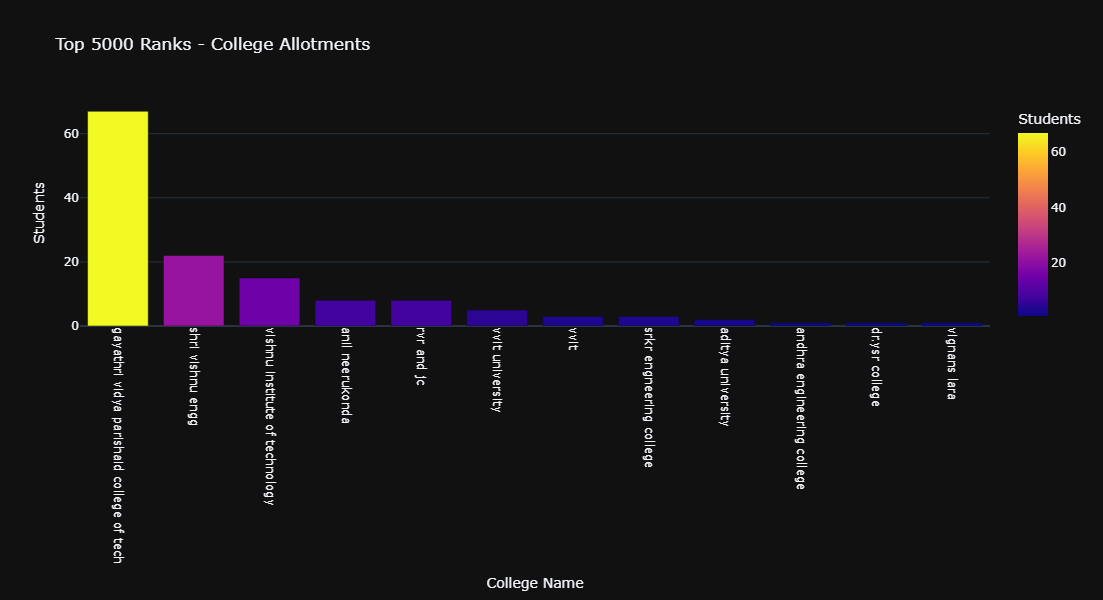

In [11]:
import plotly.express as px
import pandas as pd

# Assuming df1 is already cleaned and filtered for top 5000 ranks:
top = df1[df1["Rank"].astype(int) <= 5000]

# Count of students per college
college_counts = top["clg_name"].value_counts().reset_index()
college_counts.columns = ["College", "Number of Students"]

# Plotly Bar Chart
fig = px.bar(
    college_counts,
    x="College",
    y="Number of Students",
    title="Top 5000 Ranks - College Allotments",
    hover_data=["College", "Number of Students"],
    labels={"College": "College Name", "Number of Students": "Students"},
    color="Number of Students"
)

fig.update_layout(
    xaxis_tickangle=90,
    height=600,
    width=1000,
    template="plotly_dark"
)

fig.show()


# Most Preferred College

In [12]:
college_counts = top["clg_name"].value_counts()

most_chosen_college = college_counts.idxmax()   # College name with max count
num_students = college_counts.max()             # How many students chose it

print(f"The most chosen college is: {most_chosen_college}")
print(f"Number of students who chose it: {num_students}")


The most chosen college is: gayathri vidya parishaid college of tech
Number of students who chose it: 67


In [13]:
k=df1.clg_name.value_counts()
k

clg_name
vvit university                                  538
aditya university                                476
godavari global university                       290
raghu                                            284
vvit                                             249
annamacharya inst of technology                  237
nri inst of technology                           237
anantha lakshmi inst of technology               220
tirumala eng college                             202
anil neerukonda                                  190
srkr engneering college                          189
annamacharya inst of technaology and sciences    189
kakinada inst of tech                            143
aditya institute of tech                         142
vignans lara                                     142
rvr and jc                                       142
gayathri vidhya parishaid for women              142
vsm college                                      142
gates institute of technology        

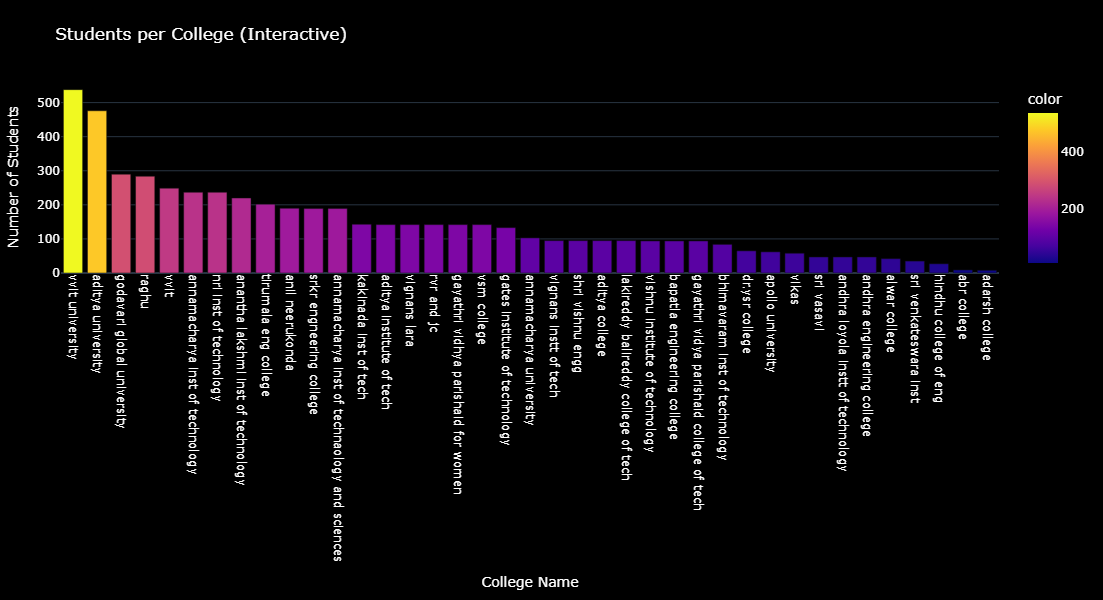

In [14]:
import plotly.express as px

fig = px.bar(
    x=k.index,        # College Names
    y=k.values,       # Number of Students
    labels={'x': 'College Name', 'y': 'Number of Students'},
    title='Students per College (Interactive)',
    color=k.values,   # Gradient color based on student count
    color_continuous_scale='plasma',  # Try also: 'viridis', 'sunsetdark', 'thermal'
    height=600,
    width=1100
)

# Dark theme + style
fig.update_layout(
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    xaxis_tickangle=90,
    margin=dict(l=60, r=40, t=80, b=180)
)

# Hover customization
fig.update_traces(
    hovertemplate='<b>%{x}</b><br>Students: %{y}<extra></extra>'
)

fig.show()


# Top 10 most preferred and least preferred

In [15]:

print("Top 10 Most Preferred Colleges:")
print(k.head(10))

Top 10 Most Preferred Colleges:
clg_name
vvit university                       538
aditya university                     476
godavari global university            290
raghu                                 284
vvit                                  249
annamacharya inst of technology       237
nri inst of technology                237
anantha lakshmi inst of technology    220
tirumala eng college                  202
anil neerukonda                       190
Name: count, dtype: int64


In [16]:
print("Top 10 Least Preferred Colleges:")
print(k.tail(10))


Top 10 Least Preferred Colleges:
clg_name
apollo university                    62
vikas                                58
sri vasavi                           47
andhra loyola instt of technology    47
andhra engineering college           47
alwar college                        42
sri venkateswara inst                35
hindhu college of eng                27
abr college                           9
adarsh college                        8
Name: count, dtype: int64


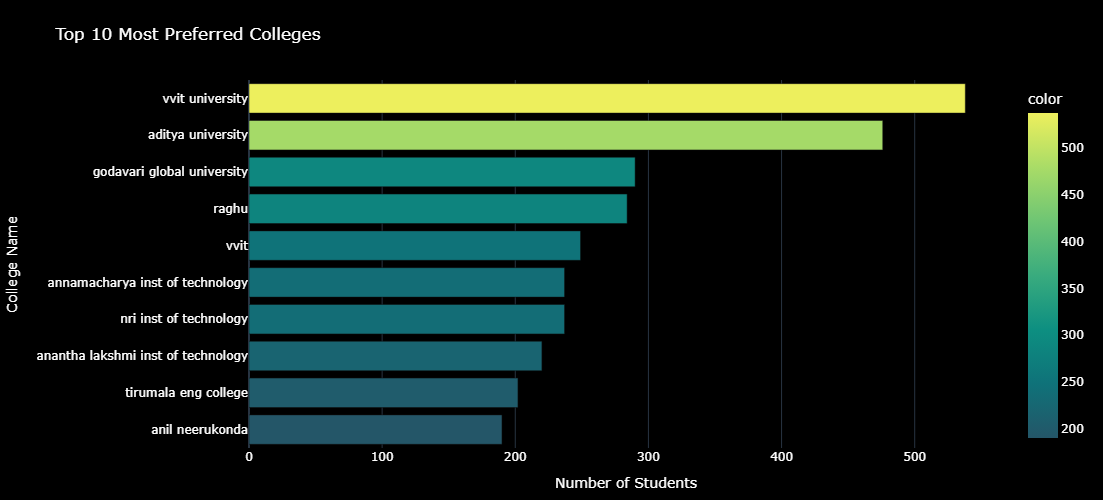

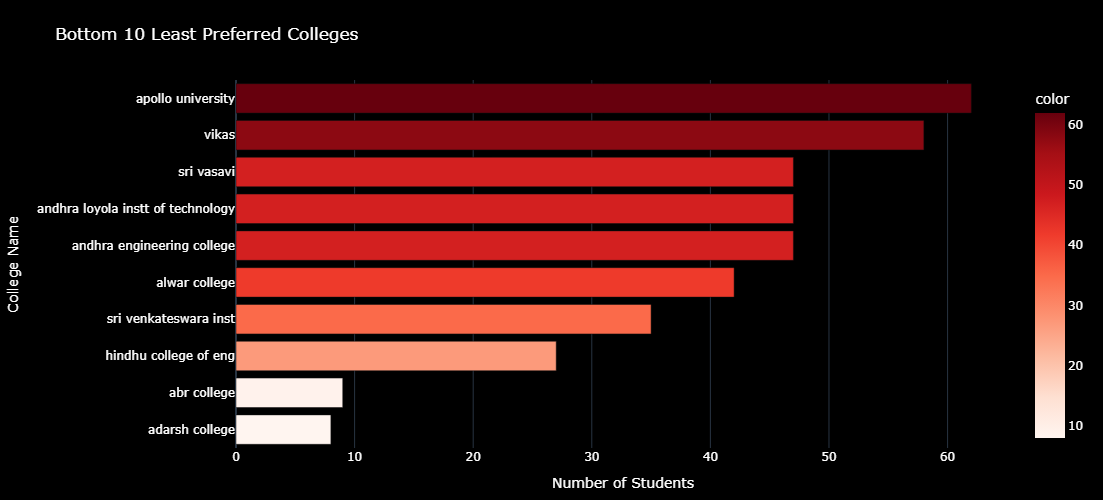

In [17]:
import plotly.express as px

# Value counts of each college
college_counts = df1['clg_name'].value_counts()

# How many colleges to show
top_n = 10
bottom_n = 10

# ------------------- TOP COLLEGES -------------------
top_colleges = college_counts.head(top_n)

fig_top = px.bar(
    x=top_colleges.values,
    y=top_colleges.index,
    orientation='h',
    title=f"Top {top_n} Most Preferred Colleges",
    labels={'x': 'Number of Students', 'y': 'College Name'},
    color=top_colleges.values,
    color_continuous_scale='Aggrnyl'
)

fig_top.update_layout(
    yaxis=dict(autorange="reversed"),
    height=500,
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=120, r=40, t=80, b=50)
)

fig_top.update_traces(
    hovertemplate='<b>%{y}</b><br>Students: %{x}<extra></extra>'
)

# ------------------- BOTTOM COLLEGES -------------------
bottom_colleges = college_counts.tail(bottom_n)

fig_bottom = px.bar(
    x=bottom_colleges.values,
    y=bottom_colleges.index,
    orientation='h',
    title=f"Bottom {bottom_n} Least Preferred Colleges",
    labels={'x': 'Number of Students', 'y': 'College Name'},
    color=bottom_colleges.values,
    color_continuous_scale='Reds'
)

fig_bottom.update_layout(
    yaxis=dict(autorange="reversed"),
    height=500,
    template='plotly_dark',
    plot_bgcolor='black',
    paper_bgcolor='black',
    font=dict(color='white'),
    margin=dict(l=120, r=40, t=80, b=50)
)

fig_bottom.update_traces(
    hovertemplate='<b>%{y}</b><br>Students: %{x}<extra></extra>'
)

# ------------------- SHOW BOTH -------------------
fig_top.show()
fig_bottom.show()


# Regional Analysis

In [18]:
df1.Region.value_counts()

Region
AU     4043
SVU    1467
NL       73
Name: count, dtype: int64

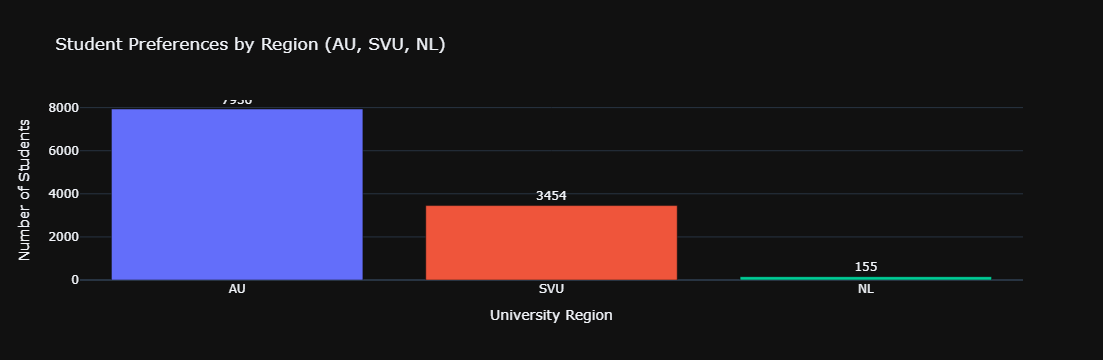

In [19]:
import plotly.express as px
import pandas as pd

# Data you provided
region_data = pd.DataFrame({
    'Region': ['AU', 'SVU', 'NL'],
    'Students': [7936, 3454, 155]
})

# Plotting using Plotly
fig = px.bar(
    region_data,
    x='Region',
    y='Students',
    text='Students',
    color='Region',
    title='Student Preferences by Region (AU, SVU, NL)',
    hover_data={'Region': True, 'Students': True},
)

fig.update_traces(textposition='outside')
fig.update_layout(
    yaxis_title="Number of Students",
    xaxis_title="University Region",
    template='plotly_dark',
    showlegend=False
)

fig.show()


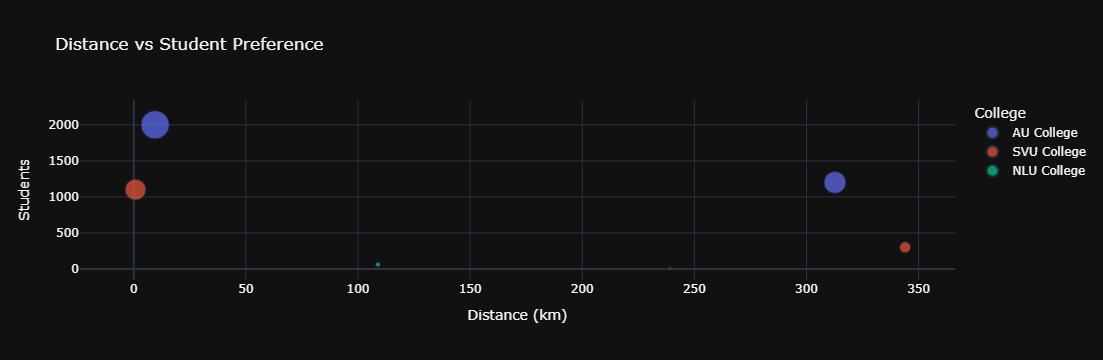

In [20]:
# Sample dataset
import pandas as pd
from geopy.distance import geodesic
import plotly.express as px

# Example locations (lat, long)
district_coords = {
    "Vijayawada": (16.5062, 80.6480),
    "Visakhapatnam": (17.6868, 83.2185),
    "Tirupati": (13.6288, 79.4192),
}

college_coords = {
    "AU College": (17.7191, 83.3018),
    "SVU College": (13.6355, 79.4199),
    "NLU College": (14.4426, 79.9865),
}

# Simulate student preferences
data = []
students = {
    "AU College": [("Vijayawada", 1200), ("Visakhapatnam", 2000)],
    "SVU College": [("Vijayawada", 300), ("Tirupati", 1100)],
    "NLU College": [("Tirupati", 60), ("Vijayawada", 13)],
}

for clg, dist_list in students.items():
    clg_coord = college_coords[clg]
    for district, count in dist_list:
        dist_coord = district_coords[district]
        distance_km = round(geodesic(clg_coord, dist_coord).km, 2)
        data.append({
            "College": clg,
            "District": district,
            "Distance (km)": distance_km,
            "Students": count
        })

df = pd.DataFrame(data)

# Plotting
fig = px.scatter(
    df,
    x="Distance (km)",
    y="Students",
    color="College",
    size="Students",
    hover_name="College",
    hover_data=["District", "Distance (km)", "Students"],
    title="Distance vs Student Preference"
)

fig.update_layout(template="plotly_dark")
fig.show()


# college preferrence by region 

C:\Users\pulib\AppData\Local\Temp\ipykernel_47056\2004976652.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



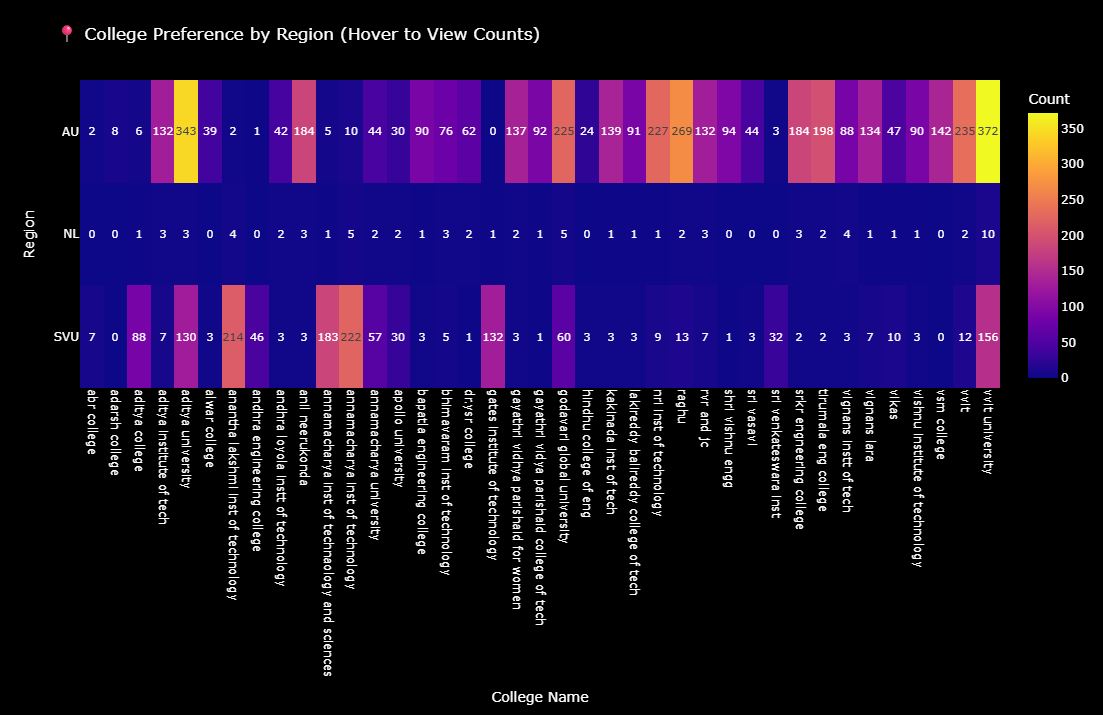

In [21]:
import pandas as pd
import plotly.express as px

# Group by Region and College
district_pref = df1.groupby(['Region', 'clg_name']).size().reset_index(name='count')

# Pivot to create a matrix for heatmap
heatmap_df = district_pref.pivot(index='Region', columns='clg_name', values='count').fillna(0)

# Create heatmap with Plotly
fig = px.imshow(
    heatmap_df,
    text_auto=True,
    aspect="auto",
    color_continuous_scale='plasma',
    labels=dict(x="College", y="Region", color="Count"),
    title="📍 College Preference by Region (Hover to View Counts)"
)

# Update layout for dark background
fig.update_layout(
    template='plotly_dark',            # Dark theme
    plot_bgcolor='black',              # Main plot background
    paper_bgcolor='black',             # Full background
    font=dict(color='white'),          # White text for visibility
    xaxis_title="College Name",
    yaxis_title="Region",
    xaxis_tickangle=90,
    autosize=False,
    width=1200,
    height=700,
    margin=dict(l=80, r=50, t=80, b=100)
)

fig.update_traces(
    hovertemplate='<b>Region: %{y}</b><br>College: %{x}<br>Count: %{z}<extra></extra>'
)

fig.show()
